In [1]:
import pandas as pd
from pycaret.regression import RegressionExperiment
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Volve P-12_DatesCorrected.csv")
_= df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3291 entries, 0 to 3290
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            3291 non-null   datetime64[ns]
 1   onstreaminject_HRS              3291 non-null   float64       
 2   BORE_WI_VOL                     3291 non-null   int64         
 3   ON_STREAM_HRS                   3291 non-null   float64       
 4   AVG_DOWNHOLE_PRESSURE           3291 non-null   float64       
 5   AVG_DOWNHOLE_TEMPERATURE        3291 non-null   float64       
 6   AVG_DP_TUBING                   3291 non-null   float64       
 7   AVG_ANNULUS_PRESS               3291 non-null   float64       
 8   AVG_CHOKE_SIZE_P in percentage  3291 non-null   float64       
 9   AVG_WHP_P                       3291 non-null   float64       
 10  AVG_WHT_P                       3291 non-null   float64       
 11  DP_C

In [4]:
df.describe()

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000
mean,19.528256,4935.663628,20.017419,76.283155,31.424488,80.758924,16.368846,64.158081,45.803679,74.345872,18.657338,1402.086752,204365.771346,2105.660438
std,8.669803,2625.955533,8.303784,118.248271,48.547561,73.006429,7.197959,33.810811,25.954204,26.140866,22.896388,1642.492700,232710.410394,1952.495950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-458.000000
25%,21.670000,3972.500000,24.000000,0.000000,0.000000,32.235500,12.543000,40.983840,32.199000,76.549000,3.663500,211.000000,33259.000000,40.500000
50%,24.000000,5335.000000,24.000000,0.000000,0.000000,37.921250,18.019000,65.988040,37.464000,81.693000,6.819000,664.000000,101142.000000,1260.000000
75%,24.000000,6851.500000,24.000000,235.838500,105.919000,170.045500,20.587000,99.895675,59.079500,90.002500,26.760500,2026.000000,295593.000000,4109.000000
max,25.000000,9316.000000,25.000000,317.701000,107.508000,314.409000,30.020000,100.000000,137.311000,92.459000,124.123000,5902.000000,851132.000000,8020.000000


In [5]:
df[df['AVG_DOWNHOLE_TEMPERATURE']==0]['AVG_DOWNHOLE_TEMPERATURE'].count()

2318

In [6]:
df.head()

,Date,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_before_2010 = df[(df['Date']<='2011-01-01') &(df['AVG_DOWNHOLE_TEMPERATURE']!=0)]

In [8]:
df_before_2010['Date'].max()

Timestamp('2010-01-13 00:00:00')

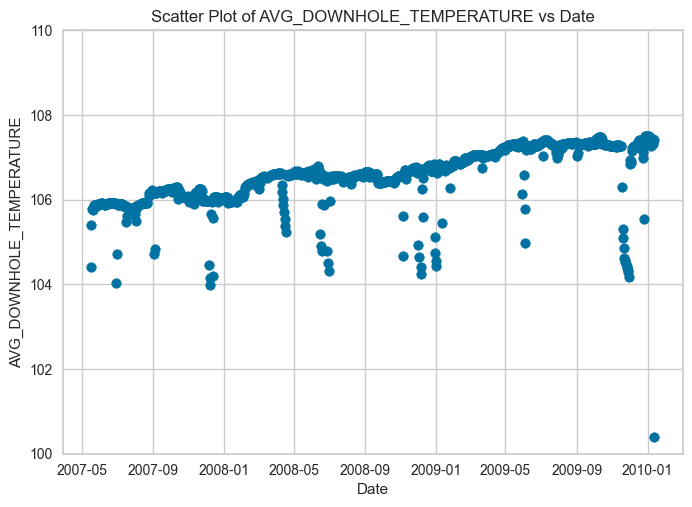

In [9]:
plt.scatter(df_before_2010['Date'], df_before_2010['AVG_DOWNHOLE_TEMPERATURE'])
plt.xlabel('Date')
plt.ylabel('AVG_DOWNHOLE_TEMPERATURE')
plt.title('Scatter Plot of AVG_DOWNHOLE_TEMPERATURE vs Date')
plt.ylim(100, 110)
plt.show()


In [10]:
df_before_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973 entries, 128 to 1100
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            973 non-null    datetime64[ns]
 1   onstreaminject_HRS              973 non-null    float64       
 2   BORE_WI_VOL                     973 non-null    int64         
 3   ON_STREAM_HRS                   973 non-null    float64       
 4   AVG_DOWNHOLE_PRESSURE           973 non-null    float64       
 5   AVG_DOWNHOLE_TEMPERATURE        973 non-null    float64       
 6   AVG_DP_TUBING                   973 non-null    float64       
 7   AVG_ANNULUS_PRESS               973 non-null    float64       
 8   AVG_CHOKE_SIZE_P in percentage  973 non-null    float64       
 9   AVG_WHP_P                       973 non-null    float64       
 10  AVG_WHT_P                       973 non-null    float64       
 11  DP_

In [11]:
exp1 = RegressionExperiment()
exp1.setup(df_before_2010, target='AVG_DOWNHOLE_TEMPERATURE')

,Description,Value
0,Session id,8063
1,Target,AVG_DOWNHOLE_TEMPERATURE
2,Target type,Regression
3,Original data shape,"(973, 15)"
4,Transformed data shape,"(973, 17)"
5,Transformed train set shape,"(681, 17)"
6,Transformed test set shape,"(292, 17)"
7,Numeric features,13
8,Date features,1
9,Preprocess,True


In [12]:
best = exp1.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.4407,11.7312,2.0140,0.5173,0.0258,0.0066,0.0260
ada,AdaBoost Regressor,0.6192,9.1745,1.9045,0.2039,0.0243,0.0079,0.0560
omp,Orthogonal Matching Pursuit,0.7723,12.6493,2.3260,-0.1412,0.0287,0.0097,0.0200
dummy,Dummy Regressor,0.7905,12.5660,2.3219,-0.1461,0.0287,0.0099,0.0210
lightgbm,Light Gradient Boosting Machine,0.6689,12.1886,2.4044,-0.8413,0.0296,0.0087,0.8270
lasso,Lasso Regression,0.9728,12.2271,2.4627,-0.9488,0.0300,0.0116,0.0230
llar,Lasso Least Angle Regression,0.9729,12.2272,2.4628,-0.9494,0.0300,0.0116,0.0250
br,Bayesian Ridge,1.0250,12.5316,2.5195,-1.1423,0.0305,0.0121,0.0200
en,Elastic Net,1.0230,12.1135,2.4931,-1.1765,0.0303,0.0120,0.0210
et,Extra Trees Regressor,0.4191,12.8873,2.4305,-1.7899,0.0302,0.0064,0.1170


In [13]:
exp1.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [14]:
df_after_2010 = df[df['Date']>df_before_2010['Date'].max()].drop(columns=['AVG_DOWNHOLE_TEMPERATURE'])

df_after_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190 entries, 1101 to 3290
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            2190 non-null   datetime64[ns]
 1   onstreaminject_HRS              2190 non-null   float64       
 2   BORE_WI_VOL                     2190 non-null   int64         
 3   ON_STREAM_HRS                   2190 non-null   float64       
 4   AVG_DOWNHOLE_PRESSURE           2190 non-null   float64       
 5   AVG_DP_TUBING                   2190 non-null   float64       
 6   AVG_ANNULUS_PRESS               2190 non-null   float64       
 7   AVG_CHOKE_SIZE_P in percentage  2190 non-null   float64       
 8   AVG_WHP_P                       2190 non-null   float64       
 9   AVG_WHT_P                       2190 non-null   float64       
 10  DP_CHOKE_SIZE                   2190 non-null   float64       
 11  B

In [15]:
df_after_2010['Date'].min()

Timestamp('2010-01-14 00:00:00')

In [16]:
predictions = exp1.predict_model(best, data=df_after_2010)

In [17]:
predictions['prediction_label'].describe()

count    2190.000000
mean      104.104856
std         0.835050
min       102.155591
25%       103.418525
50%       104.596882
75%       104.806627
max       105.641906
Name: prediction_label, dtype: float64

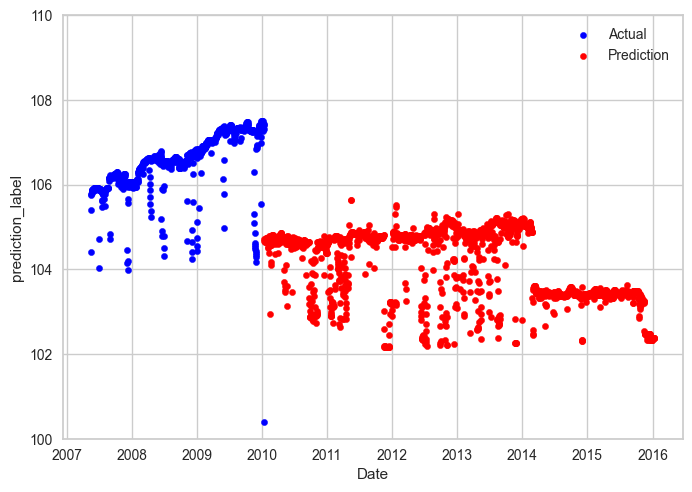

In [18]:
fig, ax = plt.subplots()

df_before_2010.plot(x='Date', y='AVG_DOWNHOLE_TEMPERATURE', kind='scatter', color='blue', ax=ax, label='Actual')
predictions.plot(x='Date', y='prediction_label', kind='scatter', color='red', ax=ax, label='Prediction')
plt.ylim(100, 110)
plt.legend()
plt.show()